# This notebook reads the initial data and performs basic EDA
  ### Reading count of paragraphs, records etc
  ### Basic analysis of distribution of postures

Mount google drive

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


Import packages

In [1]:
### Pandas and numpy for basic python dataframe operations
import pandas as pd
import numpy as np

## To read json
import json


## Itertools for list and dataframe iterations
import itertools

## Regex for basic text data processing
import re

Read data from json file as text (already zipped file has been unzipped at location)

In [2]:
full_text=[]
for line in open('/content/drive/My Drive/TR_TechChallenge/TRDataChallenge2023.txt','r', encoding='utf-8', errors='replace'):
    full_text.append(json.loads(line))

Convert json to pandas dataframe

In [3]:
full_text_pd = pd.json_normalize(full_text)

### Calculate number of documents and postures

In [4]:
full_text_pd['number_of_postures'] = full_text_pd['postures'].str.len()
full_text_pd_postures_count = full_text_pd[['documentId','postures','number_of_postures']]
total_number_of_postures = np.sum(full_text_pd_postures_count['number_of_postures'])
all_postures_in_df = list(full_text_pd_postures_count['postures'].values)
list_of_unique_postures = set(list(itertools.chain.from_iterable(all_postures_in_df)))
count_of_postures = len(list_of_unique_postures)

In [5]:
print("Total number of documents = ",full_text_pd.shape[0])

Total number of documents =  18000


In [6]:
print("Total number of distinct postures in the documents = ",count_of_postures)

Total number of distinct postures in the documents =  224


### Total number of documents = 18000
### Total number of distinct postures = 224

### Count of paragraphs

Count occurance of 'paragraphs' in the text

In [8]:
def count_of_paragraph_occurrance(text):

    return text.count("'paragraphs'")

In [9]:
full_text_pd['count_of_paragraphs'] = full_text_pd['sections'].apply(lambda x: count_of_paragraph_occurrance(str(x)))
total_number_of_paragraphs = np.sum(full_text_pd['count_of_paragraphs'])

In [10]:
print("Total number paragraphs in the documents = ",total_number_of_paragraphs)

Total number paragraphs in the documents =  91564


### Total number of paragraphs in full text corpus = 91564

# Analyze postures - counts and distributions

In [11]:
# Use pd.get_dummies() to one-hot encode the 'classes' column
full_text_pd_expanded = full_text_pd['postures'].str.join('|').str.get_dummies().add_prefix('class_')

# Concatenate the expanded columns with the original DataFrame
full_text_pd_with_classes = pd.concat([full_text_pd, full_text_pd_expanded], axis=1)



# print(full_text_pd_with_classes)

### Display count of postures

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='number_of_postures', ylabel='Count'>

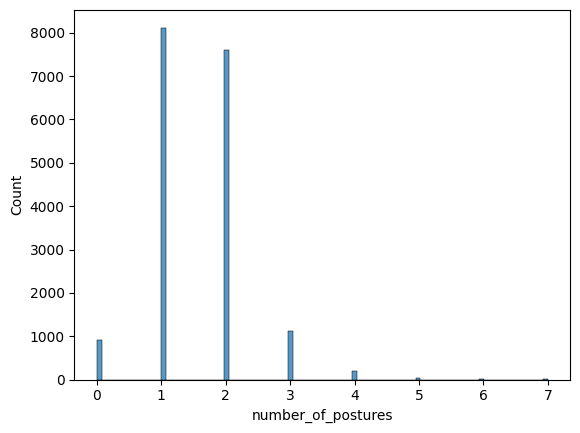

In [13]:
sns.histplot(full_text_pd_with_classes['number_of_postures'])

### Most of the records have 1 or 2 postures attached

Define the target columns

In [14]:
target_list = [col_name for col_name in full_text_pd_with_classes.columns if  "class_" in col_name]

Calculate number of occurances and percentage of cases with each postures

In [15]:
class_details_list = []
for class_name in target_list:
  count_of_occurance = full_text_pd_with_classes[class_name].sum()
  pct_of_occurance = count_of_occurance/full_text_pd_with_classes.shape[0]
  class_details = [class_name,count_of_occurance,pct_of_occurance]
  class_details_list.append(class_details)



In [16]:
class_details_df = pd.DataFrame(class_details_list,columns=['class_name','occurances','pct_of_occurance']).sort_values('pct_of_occurance',ascending=False)

Consider only the postures which have 300 or more cases (because we are taking those postures which occurs at least in 2% of all cases, and 2% of 18000 cases ~360)

In [26]:
class_details_df_top = class_details_df[class_details_df['occurances']>=300]

In [27]:
class_details_df_top

,class_name,occurances,pct_of_occurance
190,class_On Appeal,9197,0.510944
0,class_Appellate Review,4652,0.258444
219,class_Review of Administrative Decision,2773,0.154056
110,class_Motion to Dismiss,1679,0.093278
220,class_Sentencing or Penalty Phase Motion or Ob...,1342,0.074556
223,class_Trial or Guilt Phase Motion or Objection,1097,0.060944
28,class_Motion for Attorney's Fees,612,0.034000
215,class_Post-Trial Hearing Motion,512,0.028444
64,class_Motion for Preliminary Injunction,364,0.020222
114,class_Motion to Dismiss for Lack of Subject Ma...,343,0.019056


### The top three postures are "On Appeal", "Appellate review" and "Review of Administrative Decision"

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'class_On Appeal'),
  Text(1, 0, 'class_Appellate Review'),
  Text(2, 0, 'class_Review of Administrative Decision'),
  Text(3, 0, 'class_Motion to Dismiss'),
  Text(4, 0, 'class_Sentencing or Penalty Phase Motion or Objection'),
  Text(5, 0, 'class_Trial or Guilt Phase Motion or Objection'),
  Text(6, 0, "class_Motion for Attorney's Fees"),
  Text(7, 0, 'class_Post-Trial Hearing Motion'),
  Text(8, 0, 'class_Motion for Preliminary Injunction'),
  Text(9, 0, 'class_Motion to Dismiss for Lack of Subject Matter Jurisdiction')])

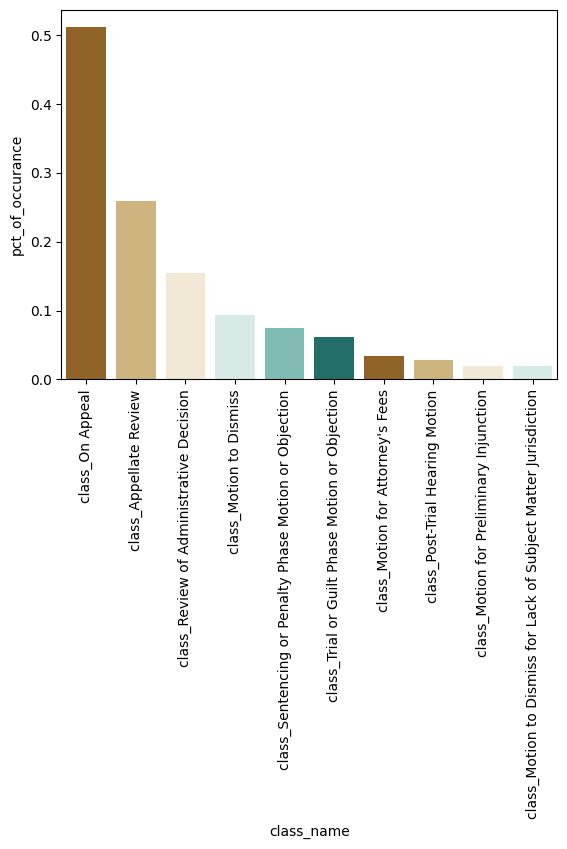

In [29]:
sns.barplot(x='class_name', y='pct_of_occurance', data = class_details_df_top,palette=sns.color_palette('BrBG'))
plt.xticks(rotation = 90)


In [25]:
class_details_df_top['class_name'].tolist()

['class_On Appeal',
 'class_Appellate Review',
 'class_Review of Administrative Decision',
 'class_Motion to Dismiss',
 'class_Sentencing or Penalty Phase Motion or Objection',
 'class_Trial or Guilt Phase Motion or Objection',
 "class_Motion for Attorney's Fees",
 'class_Post-Trial Hearing Motion',
 'class_Motion for Preliminary Injunction',
 'class_Motion to Dismiss for Lack of Subject Matter Jurisdiction']